<a href="https://colab.research.google.com/github/Aastha2105/EmployeeTurnover/blob/main/EmployeeTurnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df= pd.read_csv('HR_comma_sep.csv')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1. Performing data quality checks

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [7]:
df.describe(include='object')

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [8]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'salary' column
df['salary'] = label_encoder.fit_transform(df['salary'])

# One-hot encode the 'Department'  columns
data_encoded = pd.get_dummies(df, columns=['sales'],  dtype=int)

# Display the first few rows of the encoded DataFrame
print(data_encoded.tail())

       satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  salary  sales_IT  sales_RandD  sales_accounting  \
14994                      0       1         0            0                 0   
14995                      0    

2.1 Creating the heatmap

In [9]:
correlation_matrix= data_encoded.corr()
print(correlation_matrix)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
salary                           0.011754         0.013965        0.009672   
sales_IT                         0.006373         0.001269        0.003287   
sales_RandD                      0.006615        -0.005471        0.009703   
sales_accounting                -0.028649         0.002193      

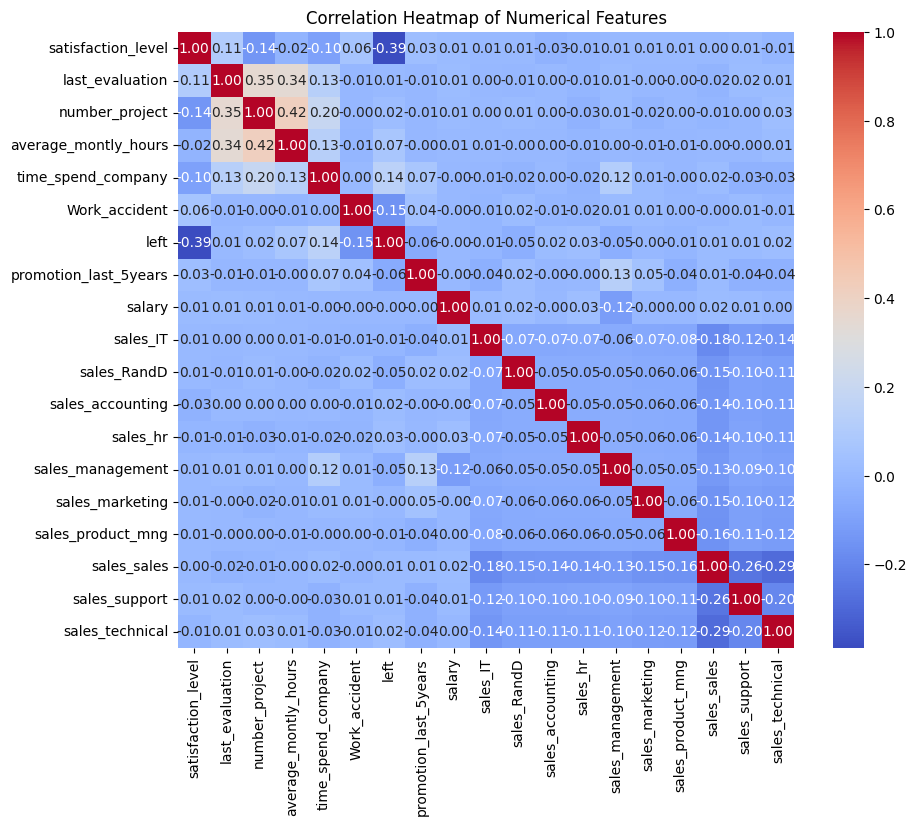

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

# Set the title
plt.title('Correlation Heatmap of Numerical Features')

# Show the plot
plt.show()

2.2 Draw the distribution plot of:
■	Employee Satisfaction
■	Employee Evaluation
■	Employee Average Monthly Hours


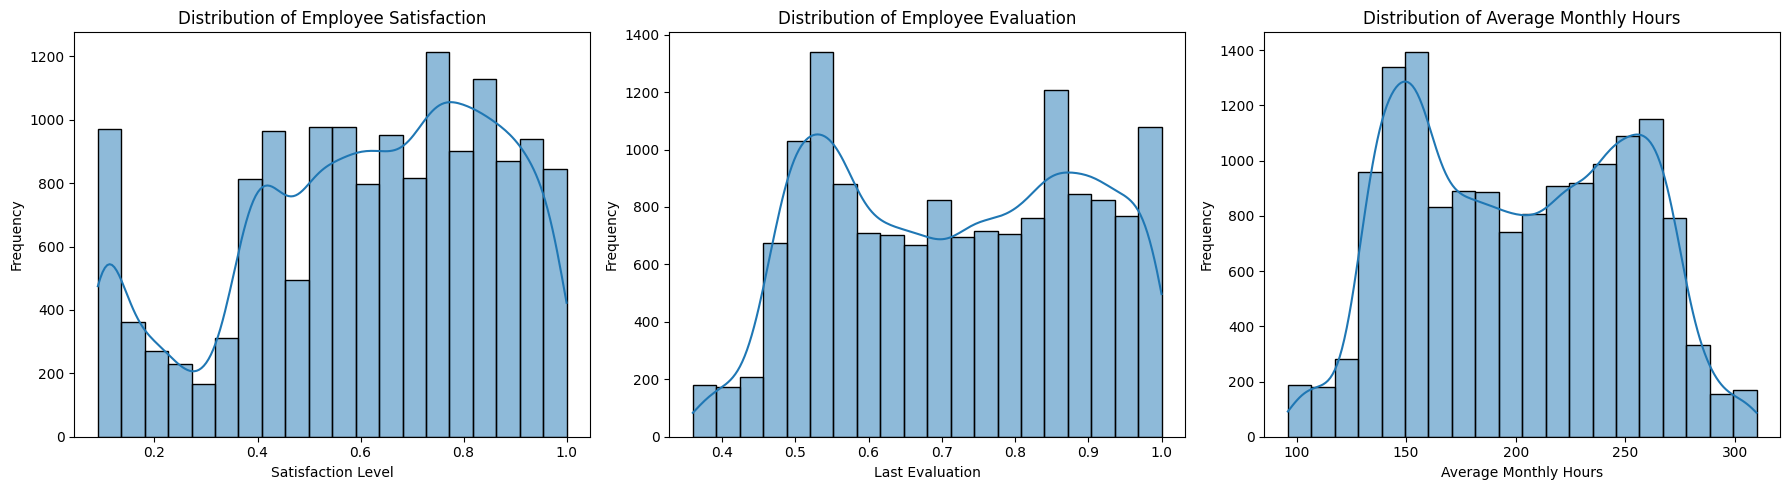

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Plot for Employee Satisfaction
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], kde=True, bins=20)
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Plot for Employee Evaluation
plt.subplot(1, 3, 2)
sns.histplot(df['last_evaluation'], kde=True, bins=20)
plt.title('Distribution of Employee Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')

# Plot for Employee Average Monthly Hours
plt.subplot(1, 3, 3)
sns.histplot(df['average_montly_hours'], kde=True, bins=20)
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

2.3.	Draw the bar plot of the employee project count of both employees who left and stayed in the organization

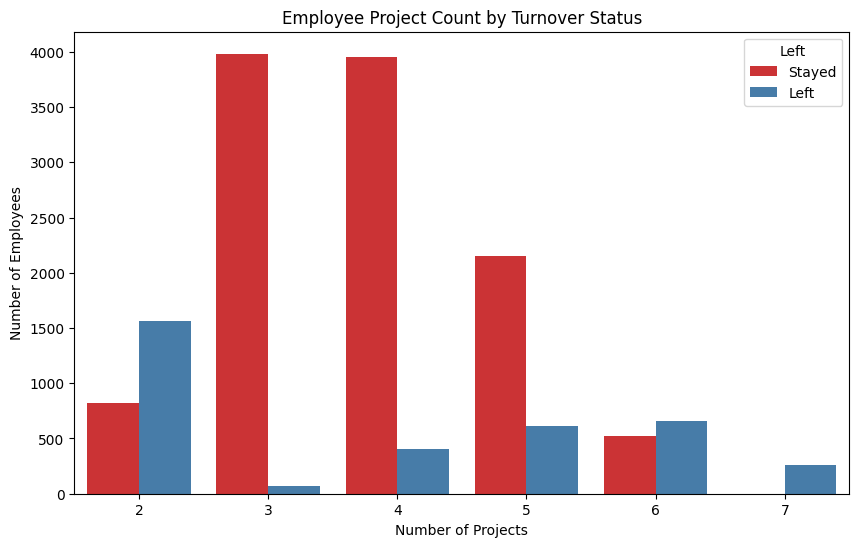

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.countplot(data=df, x='number_project', hue='left', palette='Set1')

# Set the title and labels
plt.title('Employee Project Count by Turnover Status')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)

# Show the plot
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

Seems like employees given 3-4 projects tend to leave the firm, while employees given 2 or more than 5 projects would continue staying

3.	Perform clustering of employees who left based on their satisfaction and evaluation.
  
  3.1.Choose columns satisfaction_level, last_evaluation, and left.


In [13]:
# Filter for employees who left
employees_left = data_encoded[data_encoded['left'] == 1][['satisfaction_level', 'last_evaluation']]
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(employees_left)

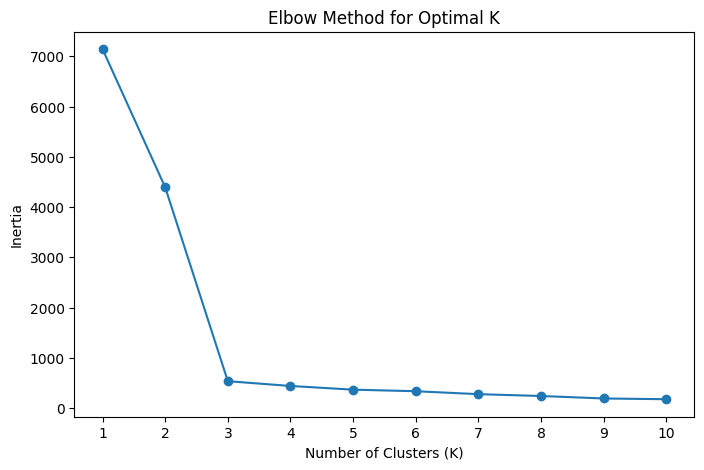

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters (K)
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

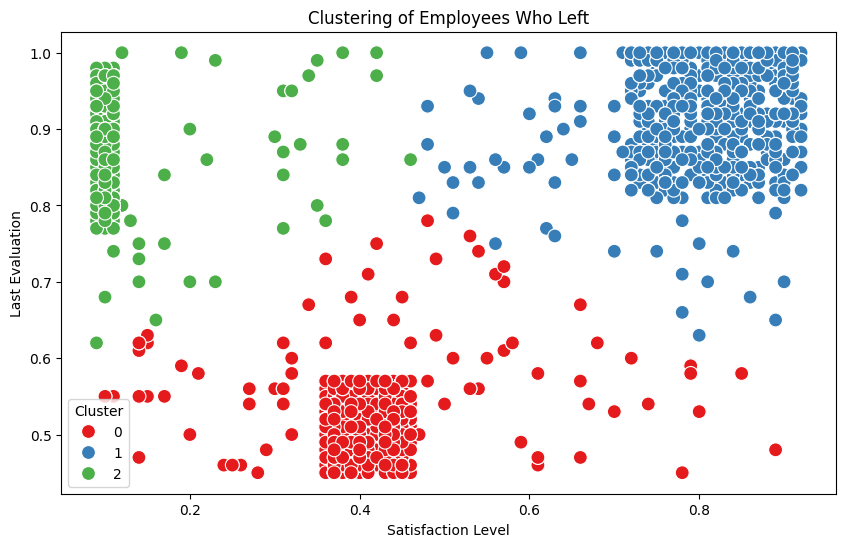

In [15]:
# Fit K-Means with the chosen number of clusters
optimal_k = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
employees_left['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=employees_left, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set1', s=100)
plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

3.2.	Do K-means clustering of employees who left the company into 3 clusters? Yes, 3 clusters

3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
    

1.   Cluster 0 (Red): This cluster appears to have lower satisfaction levels and lower evaluation scores. Employees in this group may likely have been dissatisfied with their jobs, which aligns with the tendency to leave.
2.   Cluster 1 (Green): This cluster shows a mix of satisfaction levels, but generally, these employees have a moderate evaluation score. They might have been average performers who left for various reasons, not necessarily related to dissatisfaction.
3.   Cluster 2 (Blue): This cluster consists of employees with high satisfaction levels and high evaluation scores. It's interesting to see such employees still left the company, indicating that factors other than job satisfaction or performance might have influenced their decision.


    
    

4.	Handle the left Class Imbalance using the SMOTE technique

  
  4.1.	Pre-process the data by converting categorical columns to numerical columns by:
■	Separating categorical variables and numeric variables
■	Applying get_dummies() to the categorical variables
■	Combining categorical variables and numeric variables


In [16]:
#already done before in data cleaning
print(data_encoded)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [17]:
from sklearn.model_selection import train_test_split

X= data_encoded.drop('left', axis=1)
y= data_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123, stratify=y)


4.3.	Upsample the train dataset using the SMOTE technique from the imblearn module.

In [18]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=123)

# Fit and resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print(f'Original training labels distribution:\n{y_train.value_counts()}')
print(f'Resampled training labels distribution:\n{y_train_resampled.value_counts()}')

Original training labels distribution:
left
0    9142
1    2857
Name: count, dtype: int64
Resampled training labels distribution:
left
0    9142
1    9142
Name: count, dtype: int64


5.	Perform 5-fold cross-validation model training and evaluate performance.

  5.1.	Train a logistic regression model, apply a 5-fold CV, and plot the classification report.


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

parameter_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear', 'saga'], # Solver options
}


accuracy 0.766
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



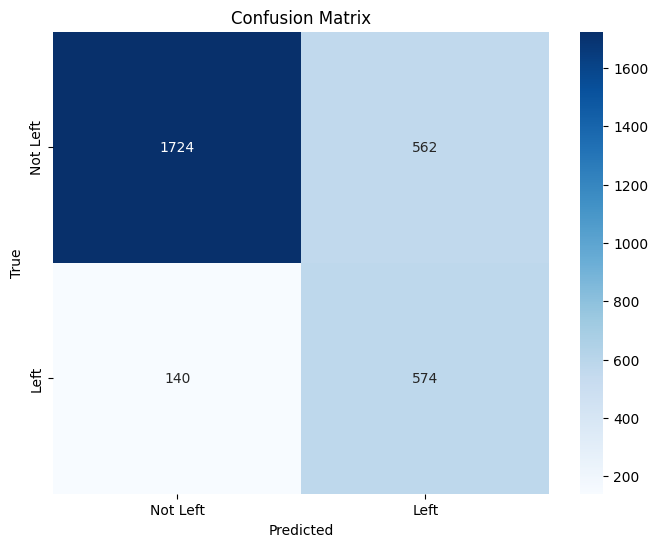

accuracy 0.766
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



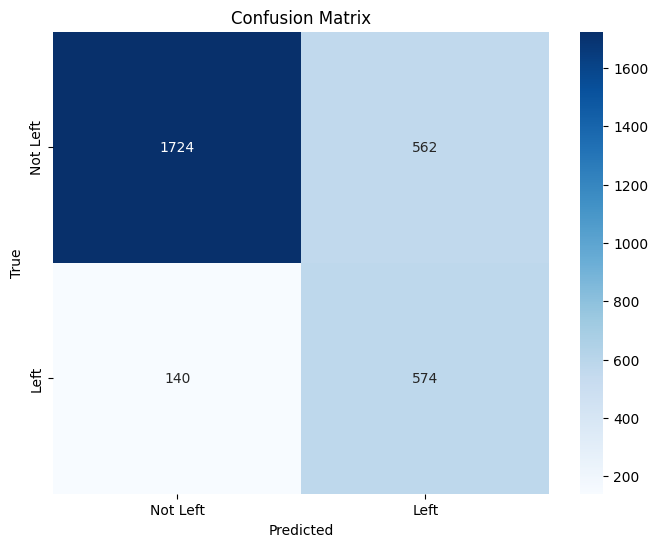

accuracy 0.766
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



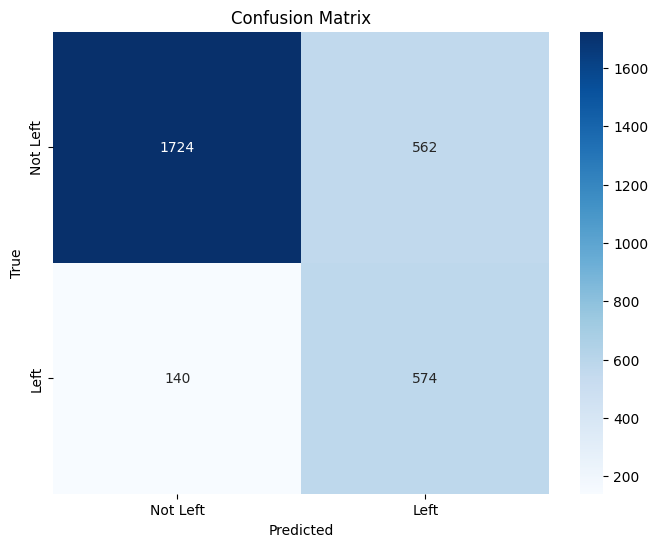

accuracy 0.766
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



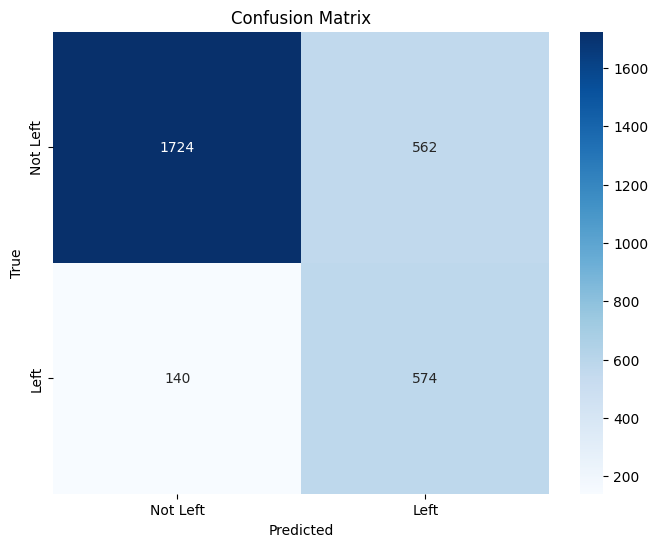

accuracy 0.766
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



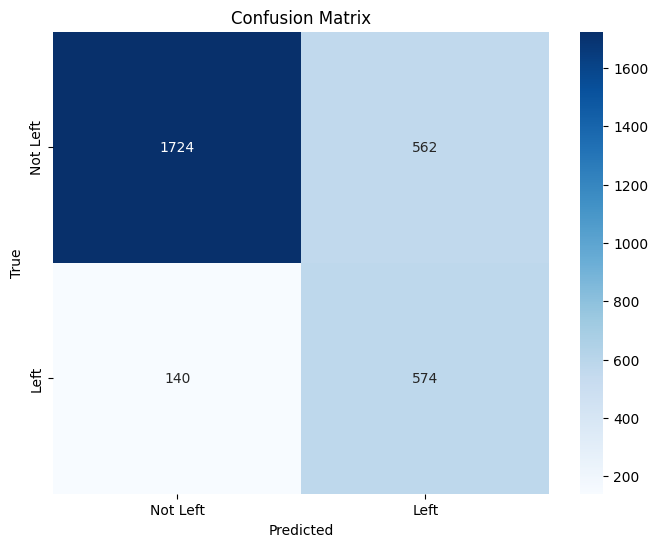

Mean Accuracy: 0.766


In [34]:
outer_results = []

for train_ind, test_ind in outer_cv.split(X, y):

    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

    sgd_logistic = LogisticRegression(max_iter=5000)

    search = RandomizedSearchCV(estimator = sgd_logistic, param_distributions = parameter_grid, cv = inner_cv, n_iter = 20,verbose=0)

    result = search.fit(X_train_resampled, y_train_resampled)

    y_pred = result.predict(X_test)
    best_model = result.best_estimator_

    acc = accuracy_score(y_test, y_pred)

    outer_results.append(acc)

    print('accuracy',acc)

    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Left', 'Left'],
                yticklabels=['Not Left', 'Left'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Print overall results
print('Mean Accuracy:', np.mean(outer_results))

The model performs well for class 0, with high precision (92%) and decent recall (75%). This means it is effective at identifying instances of class 0.
For class 1, while the recall (80%) is reasonable, the precision (51%) indicates that many predictions for class 1 are incorrect. This suggests that the model is not very reliable when it predicts class 1.
The F1-score for class 1 (62%) reflects the imbalance between precision and recall for that class, indicating the need for improvement.

5.2.	Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

Accuracy: 0.6727115141009401
              precision    recall  f1-score   support

           0       0.78      0.79      0.79     11428
           1       0.31      0.31      0.31      3571

    accuracy                           0.67     14999
   macro avg       0.55      0.55      0.55     14999
weighted avg       0.67      0.67      0.67     14999



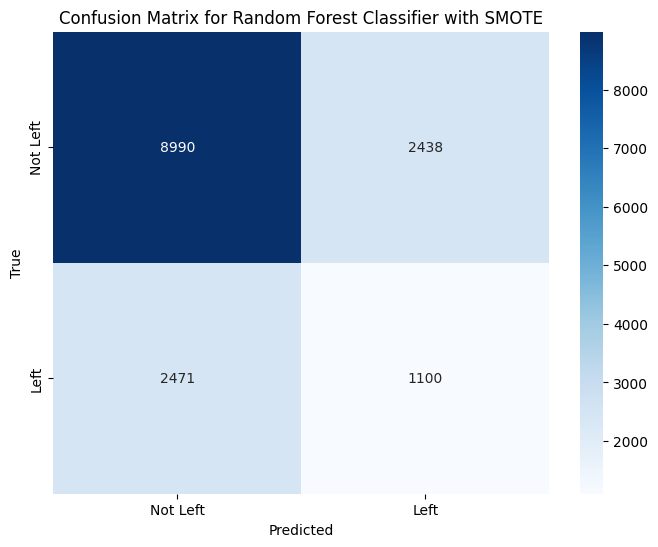

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Store predictions
y_pred = np.array([])

# Perform cross-validation
for train_idx, val_idx in cv.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train the model
    rf_classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_val_pred = rf_classifier.predict(X_val)
    y_pred = np.append(y_pred, y_val_pred)

# Calculate accuracy
acc = accuracy_score(y, y_pred)
print('Accuracy:', acc)

# Generate classification report
report = classification_report(y, y_pred)
print(report)

# Plot confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Left', 'Left'],
            yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Classifier with SMOTE')
plt.show()

The model performs reasonably well for class 0, with good precision, recall, and F1-score.
However, it performs poorly for class 1, indicating that it has difficulty identifying this class.
The overall accuracy of 67.27% is decent, but the imbalance in performance between the two classes suggests that the model may not be suitable for applications where identifying class 1 is critical.

5.3.	Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

Accuracy: 0.955922563709942
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9143
           1       0.97      0.94      0.96      9143

    accuracy                           0.96     18286
   macro avg       0.96      0.96      0.96     18286
weighted avg       0.96      0.96      0.96     18286



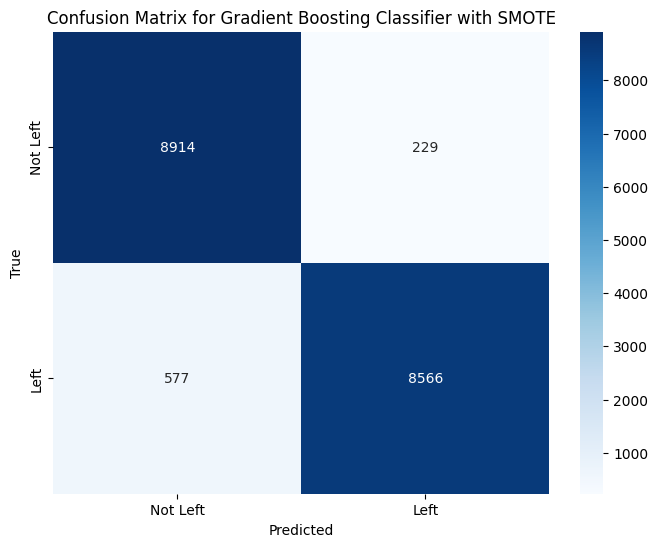

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=123)

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform cross-validation and predict
y_pred = cross_val_predict(gb_classifier, X_train_resampled, y_train_resampled, cv=cv)

# Calculate accuracy
acc = accuracy_score(y_train_resampled, y_pred)
print('Accuracy:', acc)

# Generate classification report
report = classification_report(y_train_resampled, y_pred)
print(report)


# Plot confusion matrix
cm = confusion_matrix(y_train_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Left', 'Left'],
            yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gradient Boosting Classifier with SMOTE')
plt.show()

The Gradient Boosting Classifier shows outstanding performance with high accuracy and strong metrics for both classes.
The model effectively captures the majority class (class 0) and the minority class (class 1), achieving a well-balanced performance.


6.	Identify the best model and justify the evaluation metrics used.
  
  6.1.	Find the ROC/AUC for each model and plot the ROC curve.


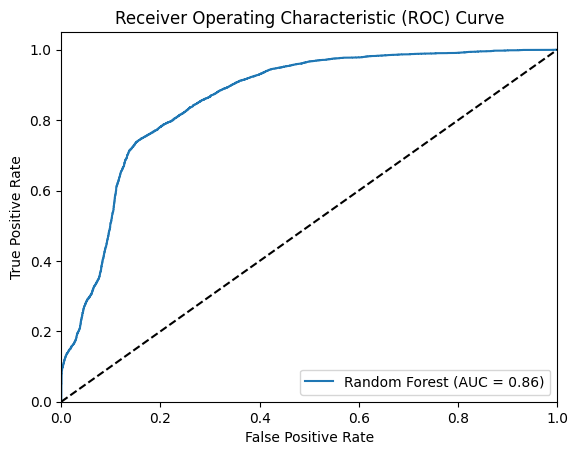

ROC AUC: 0.86


In [34]:
# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
sgd_logistic = LogisticRegression(max_iter=5000)


# Perform cross-validation and predict probabilities
y_probs = cross_val_predict(sgd_logistic, X_train_resampled, y_train_resampled, cv=cv, method='predict_proba')[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_resampled, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Plotting details
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC value
print(f"ROC AUC: {roc_auc:.2f}")

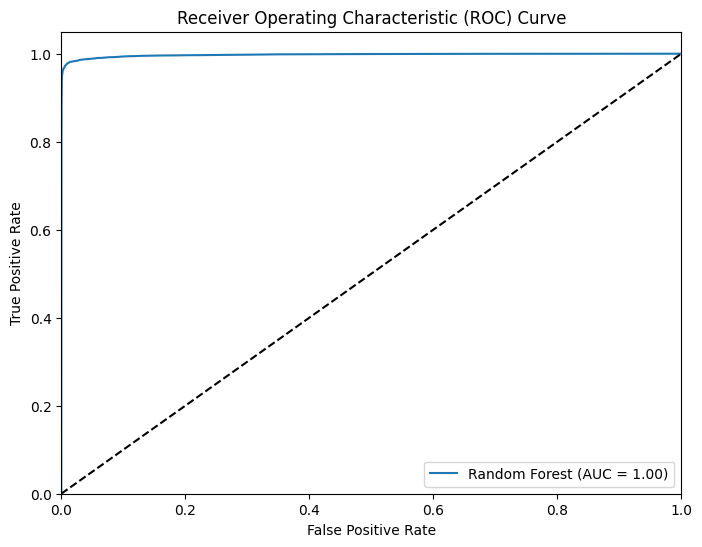

ROC AUC: 1.00


In [33]:


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform cross-validation and predict probabilities
y_probs = cross_val_predict(rf_classifier, X_train_resampled, y_train_resampled, cv=cv, method='predict_proba')[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_resampled, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC value
print(f"ROC AUC: {roc_auc:.2f}")

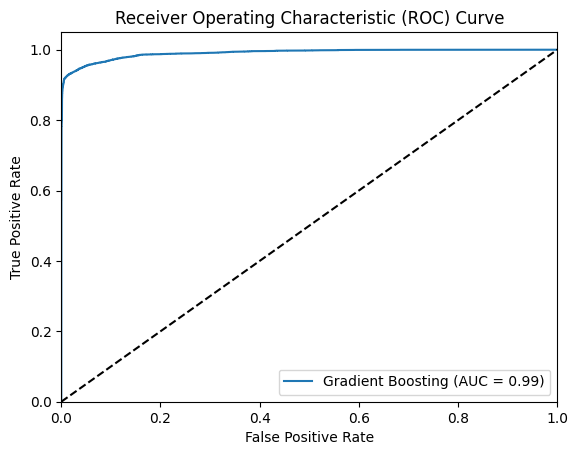

ROC AUC: 0.99


In [35]:
# Perform cross-validation and predict probabilities
y_probs = cross_val_predict(gb_classifier, X_train_resampled, y_train_resampled, cv=cv, method='predict_proba')[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_resampled, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')

# Plotting details
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC value
print(f"ROC AUC: {roc_auc:.2f}")

According to AUC, Random forest is the most suitable method with a threhold nearly 1, with Gradient boosting coming close

6.2.	Find the confusion matrix for each of the models.- already done

6.3.	Explain which metric needs to be used from the confusion matrix: Recall or Precision? I think Recall should be used to identify out of all the people that left the firm how many did the model accurately predict.  Recall = True Positives / (True Positives + False Negatives)

7.	Suggest various retention strategies for targeted employees.

  7.1.	Using the best model, predict the probability of employee turnover in the test data.


In [37]:
# Train the model on the resampled training data
gb_classifier.fit(X_train_resampled, y_train_resampled)
# Predict probabilities on the test set
y_test_probs = gb_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
# Output the predicted probabilities
print("Predicted probabilities of employee turnover in the test data:")
print(y_test_probs)

Predicted probabilities of employee turnover in the test data:
[0.0059183  0.95200733 0.122288   ... 0.05506183 0.00736243 0.9332625 ]


7.2.	Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
■	Safe Zone (Green) (Score < 20%)
■	Low-Risk Zone (Yellow) (20% < Score < 60%)
■	Medium-Risk Zone (Orange) (60% < Score < 90%)
■	High-Risk Zone (Red) (Score > 90%).


In [39]:
import pandas as pd

# Assuming y_test_probs contains the predicted probabilities
# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Employee_ID': X_test.index,  # Assuming you have an index or ID for each employee
    'Turnover_Probability': y_test_probs
})

# Define function to categorize employees
def categorize_employee(score):
    if score < 0.20:
        return 'Safe Zone (Green)'
    elif 0.20 <= score < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif 0.60 <= score < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Apply the categorization
results['Zone'] = results['Turnover_Probability'].apply(categorize_employee)

# Display the categorized results
print(results)

# Suggest retention strategies for each zone
def retention_strategy(zone):
    strategies = {
        'Safe Zone (Green)': "Continue to engage and recognize these employees. Maintain open communication and provide growth opportunities.",
        'Low-Risk Zone (Yellow)': "Monitor these employees closely. Offer more engagement activities, training, and career development options.",
        'Medium-Risk Zone (Orange)': "Implement targeted retention strategies, such as personalized communication, feedback sessions, and incentives.",
        'High-Risk Zone (Red)': "Immediate interventions are needed. Conduct exit interviews, offer retention bonuses, and address any grievances promptly."
    }
    return strategies[zone]

# Apply retention strategies
results['Retention_Strategy'] = results['Zone'].apply(retention_strategy)

# Display the results with strategies
print(results[['Employee_ID', 'Turnover_Probability', 'Zone', 'Retention_Strategy']])

      Employee_ID  Turnover_Probability                  Zone
0           10627              0.005918     Safe Zone (Green)
1            2703              0.952007  High-Risk Zone (Red)
2            6059              0.122288     Safe Zone (Green)
3            3258              0.019343     Safe Zone (Green)
4            4565              0.028178     Safe Zone (Green)
...           ...                   ...                   ...
2995         4961              0.025343     Safe Zone (Green)
2996         4557              0.052999     Safe Zone (Green)
2997         6610              0.055062     Safe Zone (Green)
2998        10327              0.007362     Safe Zone (Green)
2999          731              0.933262  High-Risk Zone (Red)

[3000 rows x 3 columns]
      Employee_ID  Turnover_Probability                  Zone  \
0           10627              0.005918     Safe Zone (Green)   
1            2703              0.952007  High-Risk Zone (Red)   
2            6059              0.122